In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
import pickle

from utils.plotting import plot_measurement
pd.options.display.max_columns = 100

## Load Mingie's Bao

In [3]:
norm_time_var_features = pickle.load(open('../data/my-mortality/norm_time_var_features.pkl', 'rb'))

In [68]:
norm_time_var_features.keys()

dict_keys(['icustay_ids', 'Ts', 'Ys', 'ind_ts', 'ind_fs', 'all_labels', 'all_rel_end_time', 'feature_name_to_idx'])

In [69]:
norm_time_var_features['feature_name_to_idx'].keys()

dict_keys(['Albumin', 'Alkaline phosphate', 'Anion gap', 'Basophils', 'Bilirubin (conjugated)', 'Bilirubin (total)', 'Blood urea nitrogen', 'CO2 (ETCO2, PCO2, etc.)', 'Calcium (total)', 'Calcium ionized', 'Cholesterol (total)', 'Creatine kinase', 'Creatinine (urine)', 'Epithelial cells (urine)', 'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose (urine)', 'Heart Rate', 'Hematocrit', 'Ketone (urine)', 'Lactate dehydrogenase', 'Macrocytes', 'Magnesium', 'Mean blood pressure', 'Nitrite (urine)', 'Oxygen saturation', 'Partial pressure of carbon dioxide', 'Partial thromboplastin time', 'Phosphate', 'Platelets', 'Positive end-expiratory pressure', 'Protein (urine)', 'Prothrombin time', 'Red blood cell count (urine)', 'Sodium', 'Systolic blood pressure', 'Temperature (C)', 'Urobilinogen (urine)', 'Yeast (urine)'])

In [70]:
norm_time_var_features['ind_kts'] = norm_time_var_features['ind_ts']
norm_time_var_features['ind_kfs'] = norm_time_var_features['ind_fs']
del norm_time_var_features['ind_ts'], norm_time_var_features['ind_fs']

In [71]:
norm_time_var_features['rel_end_time'] = norm_time_var_features['all_rel_end_time']
del norm_time_var_features['all_rel_end_time']

In [148]:
norm_time_var_features['labels'] = norm_time_var_features['all_labels']
del norm_time_var_features['all_labels']

In [7]:
norm_time_var_features['feature_name_to_idx']

{'Albumin': 0,
 'Alkaline phosphate': 1,
 'Anion gap': 2,
 'Basophils': 3,
 'Bilirubin (conjugated)': 4,
 'Bilirubin (total)': 5,
 'Blood urea nitrogen': 6,
 'CO2 (ETCO2, PCO2, etc.)': 7,
 'Calcium (total)': 8,
 'Calcium ionized': 9,
 'Cholesterol (total)': 10,
 'Creatine kinase': 11,
 'Creatinine (urine)': 12,
 'Epithelial cells (urine)': 13,
 'Fraction inspired oxygen': 14,
 'Glascow coma scale total': 15,
 'Glucose (urine)': 16,
 'Heart Rate': 17,
 'Hematocrit': 18,
 'Ketone (urine)': 19,
 'Lactate dehydrogenase': 20,
 'Macrocytes': 21,
 'Magnesium': 22,
 'Mean blood pressure': 23,
 'Nitrite (urine)': 24,
 'Oxygen saturation': 25,
 'Partial pressure of carbon dioxide': 26,
 'Partial thromboplastin time': 27,
 'Phosphate': 28,
 'Platelets': 29,
 'Positive end-expiratory pressure': 30,
 'Protein (urine)': 31,
 'Prothrombin time': 32,
 'Red blood cell count (urine)': 33,
 'Sodium': 34,
 'Systolic blood pressure': 35,
 'Temperature (C)': 36,
 'Urobilinogen (urine)': 37,
 'Yeast (urine)'

In [72]:
norm_time_var_features['feature_name_to_idx'].keys()

dict_keys(['Albumin', 'Alkaline phosphate', 'Anion gap', 'Basophils', 'Bilirubin (conjugated)', 'Bilirubin (total)', 'Blood urea nitrogen', 'CO2 (ETCO2, PCO2, etc.)', 'Calcium (total)', 'Calcium ionized', 'Cholesterol (total)', 'Creatine kinase', 'Creatinine (urine)', 'Epithelial cells (urine)', 'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose (urine)', 'Heart Rate', 'Hematocrit', 'Ketone (urine)', 'Lactate dehydrogenase', 'Macrocytes', 'Magnesium', 'Mean blood pressure', 'Nitrite (urine)', 'Oxygen saturation', 'Partial pressure of carbon dioxide', 'Partial thromboplastin time', 'Phosphate', 'Platelets', 'Positive end-expiratory pressure', 'Protein (urine)', 'Prothrombin time', 'Red blood cell count (urine)', 'Sodium', 'Systolic blood pressure', 'Temperature (C)', 'Urobilinogen (urine)', 'Yeast (urine)'])

In [73]:
norm_time_var_features['feature_names'] = list(norm_time_var_features['feature_name_to_idx'].keys())

In [74]:
norm_time_var_features.keys()

dict_keys(['icustay_ids', 'Ts', 'Ys', 'all_labels', 'feature_name_to_idx', 'ind_kts', 'ind_kfs', 'rel_end_time', 'feature_names'])

## Sanity Check

In [76]:
norm_time_var_features['rel_end_time'][4322]

1.5963888888888889

In [77]:
norm_time_var_features['Ys'][4322]

[]

In [78]:
for idx in range(len(norm_time_var_features['Ys'])):
    T, Y, ind_kf, ind_kt = (norm_time_var_features[k][idx] for k in ['Ts', 'Ys', 'ind_kfs', 'ind_kts'])

    assert len(Y) == len(ind_kf) == len(ind_kt)
    if len(ind_kt) == 0:
        print(idx)
        continue
    assert len(ind_kt) > 0 and max(ind_kt) <= len(T) - 1, 'idx is %d' % idx

4322


In [79]:
assert len(norm_time_var_features['Ys']) == len(norm_time_var_features['Ts']) == len(norm_time_var_features['ind_kfs']) == len(norm_time_var_features['ind_kts'])

## Filter time < 0 measurements

In [81]:
# Check the T. Seems OK!
for T, rel_end_time in zip(norm_time_var_features['Ts'], norm_time_var_features['rel_end_time']):
    if T[0] < 0:
        print(T)
    if T[-1] > rel_end_time:
        print('%.1f Bigger than the rel_end_time %.1f' % (T[-1], rel_end_time))
        print(T)

In [82]:
# total_idxes = len(norm_time_var_features['Ys'])
# for idx in range(total_idxes):
#     T, Y, ind_kf, ind_kt = (norm_time_var_features[k][idx] for k in ['Ts', 'Ys', 'ind_kfs', 'ind_kts'])

#     t_idx = 0
#     while T[t_idx] < 0:
#         t_idx += 1

#     last_idx = ind_kt[-1]
#     norm_time_var_features['Ts'][idx] = T[t_idx:(last_idx + 1)]

#     for val in ind_kt:
#         if val < idx:
#             assert('something wrong here!')

#     the_arr = ind_kt[:]
#     norm_time_var_features['ind_kts'][idx] = [val - t_idx for val in the_arr]

## Switch the order since Mingie is stupid 

In [83]:
for idx in range(len(norm_time_var_features['Ys'])):
    theorder = np.argsort(norm_time_var_features['ind_kts'][idx])

    norm_time_var_features['ind_kts'][idx] = (np.array(norm_time_var_features['ind_kts'][idx])[theorder]).tolist()
    norm_time_var_features['ind_kfs'][idx] = (np.array(norm_time_var_features['ind_kfs'][idx])[theorder]).tolist()
    norm_time_var_features['Ys'][idx] = (np.array(norm_time_var_features['Ys'][idx])[theorder]).tolist()

num_features: 39


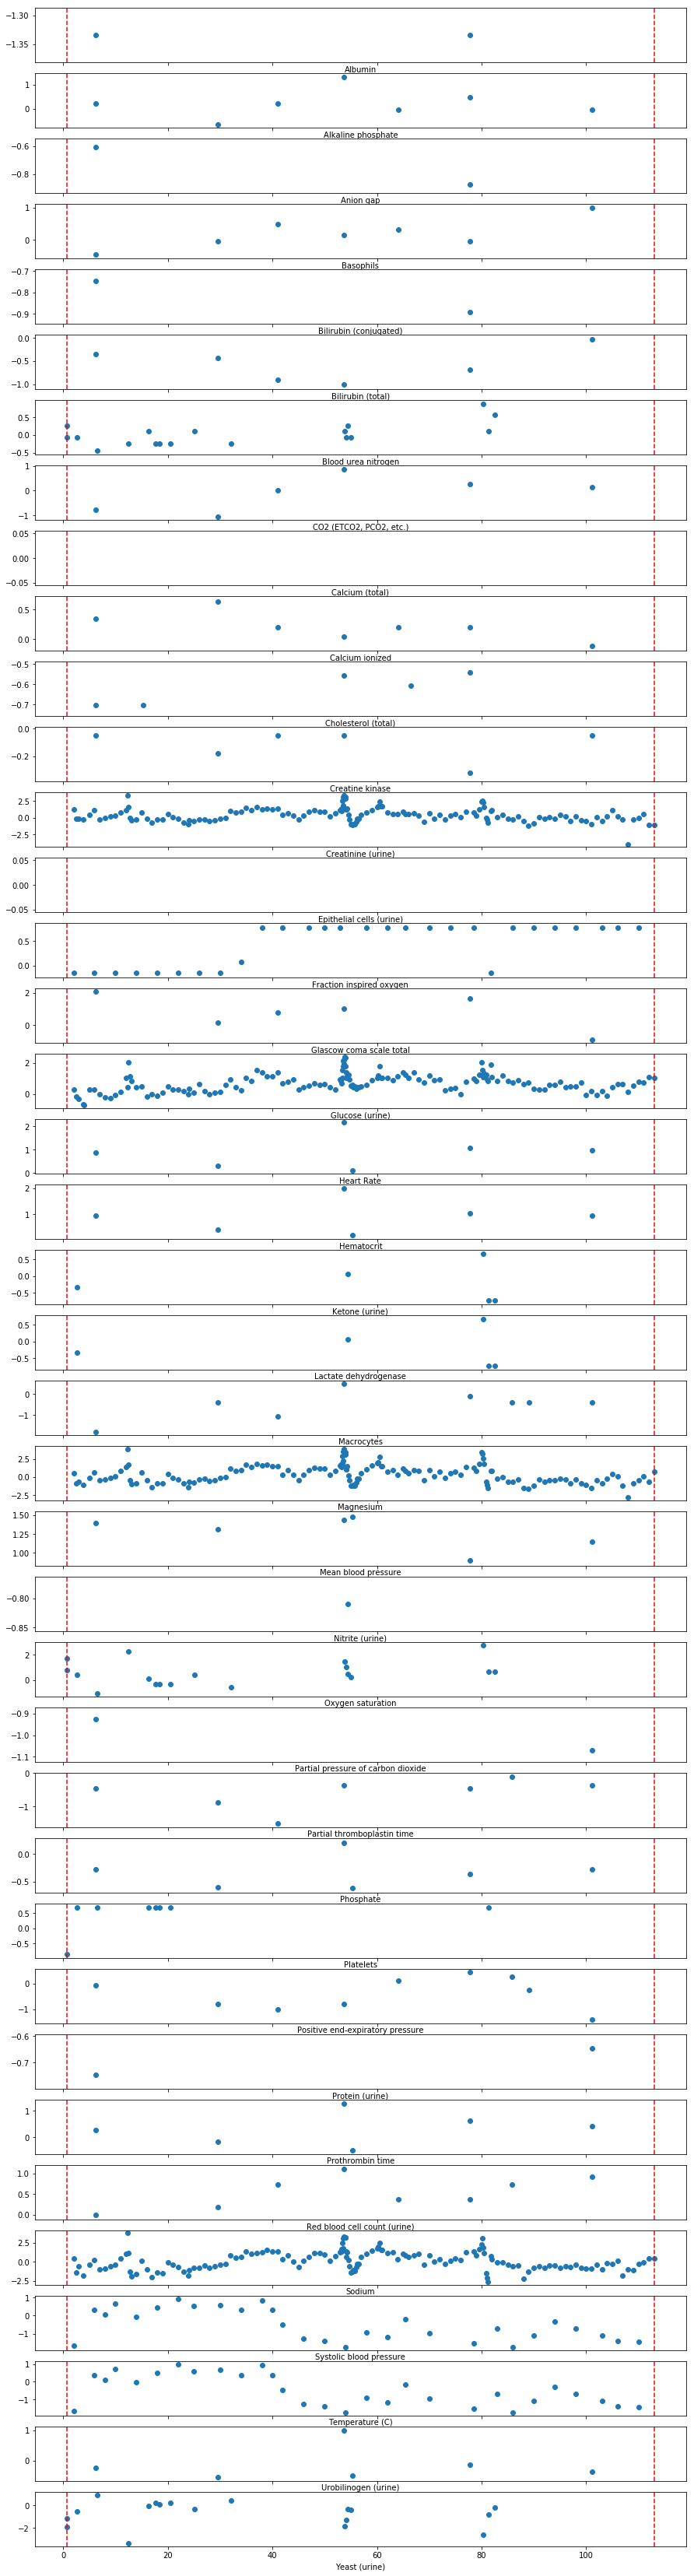

In [84]:
y, ind_kf, ind_kt, t = (norm_time_var_features[k][10] for k in ['Ys', 'ind_kfs', 'ind_kts', 'Ts'])
plot_measurement(t=t, y=y, ind_kt=ind_kt, ind_kf=ind_kf, feature_names=norm_time_var_features['feature_names'])

## Load the other bao

In [85]:
time_inv_features = pickle.load(open('../data/my-mortality/time_inv_features.pkl', 'rb'))

In [86]:
time_inv_features.describe()

,icustay_id,Mortality,Age,Gender,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,hypothyroidism,renal_failure,liver_disease,peptic_ulcer,aids,lymphoma,metastatic_cancer,solid_tumor,rheumatoid_arthritis,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
count,41856.000000,41856.000000,4.185600e+04,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000,41856.000000
mean,250091.647076,0.105672,2.154240e-16,0.059036,0.103020,0.023772,0.096545,0.035025,0.714115,0.027523,0.155677,0.170059,0.057435,0.035742,0.083453,0.116590,0.028049,0.079224,0.187906,0.199541,0.064722,0.103068,0.141987,0.063862,0.000908,0.005519,0.013690,0.042312,0.026400,0.028813,0.100487,0.051414,0.032206,0.284523,0.020427,0.186019,0.068019,0.033137,0.042336,0.092818
std,28928.871069,0.307421,1.000012e+00,0.496508,0.303988,0.152340,0.295341,0.183845,0.451840,0.163603,0.362553,0.375689,0.232675,0.185647,0.276569,0.320935,0.165114,0.270091,0.390642,0.399660,0.246037,0.304051,0.349041,0.244510,0.030118,0.074085,0.116201,0.201302,0.160324,0.167283,0.300652,0.220844,0.176548,0.451192,0.141458,0.389126,0.251781,0.178997,0.201356,0.290181
min,200001.000000,0.000000,-2.636531e+00,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224994.750000,0.000000,-6.568387e-01,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250039.500000,0.000000,9.690248e-02,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,275224.250000,0.000000,8.081888e-01,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299999.000000,1.000000,1.507161e+00,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
time_inv_features.shape

(41856, 40)

In [88]:
time_inv_features.corr()

,icustay_id,Mortality,Age,Gender,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,hypothyroidism,renal_failure,liver_disease,peptic_ulcer,aids,lymphoma,metastatic_cancer,solid_tumor,rheumatoid_arthritis,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
icustay_id,1.000000,0.000248,0.005395,0.003742,-0.002701,0.000098,-0.003585,-0.008834,0.008063,-0.000944,-0.003498,0.001267,0.000103,-0.008896,0.006508,0.003112,-0.004009,0.003565,-0.000798,-0.005643,-0.002127,-0.001673,0.000875,-0.001021,0.004145,0.001474,0.002304,-0.002909,-0.000085,0.002882,0.009120,-0.001135,-0.000690,0.001993,0.001035,0.004335,0.007323,0.005380,0.002970,0.001066
Mortality,0.000248,1.000000,0.137249,-0.020132,0.064258,0.008600,-0.033162,-0.029978,-0.010755,-0.004149,0.088626,0.106294,0.027712,0.032199,0.009242,0.027442,-0.003322,0.012831,0.006942,0.004750,-0.011771,-0.004567,0.037628,0.032592,-0.002621,-0.008823,0.025716,0.086039,0.020472,-0.002527,0.113104,-0.032871,0.026216,0.117570,-0.007884,-0.034305,-0.009213,-0.026731,-0.025185,-0.044870
Age,0.005395,0.137249,1.000000,-0.088245,0.006963,-0.014452,-0.098665,-0.112971,0.130333,-0.054374,0.220079,0.269832,0.134946,0.035265,0.119865,0.142542,-0.002257,0.016314,0.107262,0.137828,0.010052,0.129008,0.148904,-0.110911,0.007261,-0.059240,0.026910,0.023136,0.052810,0.034889,-0.002766,-0.049854,0.020268,0.049096,0.013894,0.054441,-0.190589,-0.210243,-0.106332,-0.057169
Gender,0.003742,-0.020132,-0.088245,1.000000,0.028879,0.004346,-0.081476,0.020796,0.016659,0.019998,-0.062205,-0.020137,-0.038244,-0.033260,0.018493,0.030123,0.001076,-0.018130,-0.066988,0.004928,0.003632,-0.166284,0.043655,0.057210,-0.006780,0.026541,0.014772,-0.008618,0.033696,-0.098435,0.009875,-0.035308,-0.006154,-0.050292,-0.023123,-0.061046,0.107299,0.038609,-0.032169,-0.080402
Ethnicity_0,-0.002701,0.064258,0.006963,0.028879,1.000000,-0.052884,-0.110785,-0.064565,-0.535621,-0.057013,-0.046018,-0.047342,-0.023530,-0.019524,-0.003367,-0.069730,-0.018538,-0.030151,-0.015543,0.010143,-0.035804,-0.025443,-0.077291,-0.031621,-0.010216,-0.012516,-0.012195,-0.024772,-0.019039,-0.020786,-0.005830,-0.010569,-0.023537,-0.055370,-0.011713,-0.052537,0.009272,0.004440,-0.011144,-0.040148
Ethnicity_1,0.000098,0.008600,-0.014452,0.004346,-0.052884,1.000000,-0.051012,-0.029729,-0.246630,-0.026252,-0.011203,0.001583,-0.004144,0.007972,-0.021569,0.004883,0.008636,-0.011513,-0.030900,-0.001391,0.001021,-0.016275,0.004818,0.010556,-0.004704,-0.011625,-0.011636,0.027969,0.025172,-0.014690,0.013571,-0.027808,0.008844,0.013869,0.015161,0.004801,-0.031568,-0.025384,-0.017232,-0.031539
Ethnicity_2,-0.003585,-0.033162,-0.098665,-0.081476,-0.110785,-0.051012,1.000000,-0.062279,-0.516655,-0.054995,0.048846,-0.028253,0.002748,0.032493,-0.016156,0.129021,0.022859,0.024517,0.011115,0.039198,0.087611,-0.039509,0.126830,0.033725,-0.001796,0.045532,0.008827,-0.010039,-0.003372,0.035576,0.009130,0.046973,0.000393,0.067817,0.007122,0.081348,-0.004455,0.043428,0.010816,0.016705
Ethnicity_3,-0.008834,-0.029978,-0.112971,0.020796,-0.064565,-0.029729,-0.062279,1.000000,-0.301105,-0.032051,-0.008324,-0.030893,-0.014075,-0.002378,-0.010498,0.012585,0.010925,-0.001031,-0.003483,0.022916,0.020134,-0.020558,0.006273,0.038469,0.002887,0.006857,-0.013498,-0.008411,-0.006244,-0.023493,0.008077,0.008019,-0.014879,0.009761,0.004643,0.006111,0.019244,0.020634,0.005122,0.028630
Ethnicity_4,0.008063,-0.010755,0.130333,0.016659,-0.535621,-0.246630,-0.516655,-0.301105,1.000000,-0.265886,0.014997,0.069097,0.022559,-0.009489,0.025160,-0.041994,-0.011968,0.008613,0.020640,-0.042376,-0.041809,0.061443,-0.031811,-0.021589,0.005028,-0.019956,0.014931,0.017679,0.010192,0.006884,-0.009597,-0.015

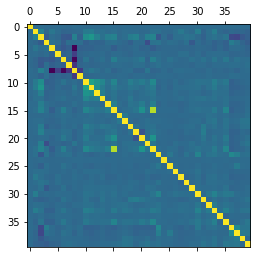

In [89]:
import matplotlib.pyplot as plt

plt.matshow(time_inv_features.corr())

In [90]:
time_inv_features = time_inv_features.drop(['Mortality'], axis=1)

In [91]:
time_inv_features.shape

(41856, 39)

In [92]:
len(norm_time_var_features['icustay_ids'])

41744

In [97]:
join_df = pd.DataFrame(norm_time_var_features['icustay_ids'], columns=['icustay_ids']).join(time_inv_features.set_index('icustay_id'), on='icustay_ids', how='left')

In [98]:
join_df.describe()

,icustay_ids,Age,Gender,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,hypothyroidism,renal_failure,liver_disease,peptic_ulcer,aids,lymphoma,metastatic_cancer,solid_tumor,rheumatoid_arthritis,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,250096.170252,0.000078,0.059146,0.103081,0.023620,0.096565,0.035023,0.714186,0.027525,0.155807,0.170132,0.057421,0.035837,0.083557,0.116640,0.028028,0.079125,0.188195,0.199645,0.064776,0.103033,0.141984,0.063889,0.000910,0.005534,0.013655,0.042353,0.026447,0.028819,0.100637,0.051433,0.032292,0.284855,0.020482,0.186182,0.068058,0.033154,0.042329,0.092780
std,28930.435649,0.999855,0.496495,0.304068,0.151864,0.295368,0.183840,0.451806,0.163609,0.362676,0.375753,0.232649,0.185887,0.276725,0.320994,0.165055,0.269937,0.390872,0.399739,0.246133,0.304005,0.349038,0.244559,0.030158,0.074184,0.116054,0.201397,0.160462,0.167298,0.300851,0.220881,0.176777,0.451351,0.141644,0.389258,0.251848,0.179042,0.201342,0.290127
min,200001.000000,-2.636531,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224994.750000,-0.656818,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250047.500000,0.097253,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,275231.500000,0.808011,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299999.000000,1.507161,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
join_df.shape

(41744, 39)

In [100]:
join_df.isnull().values.any()

False

In [164]:
norm_time_var_features['covs'] = join_df.iloc[:, 1:].values

In [102]:
norm_time_var_features['covs_names'] = list(join_df.columns[1:])

## Incoporate test set idxes

In [121]:
test_set_icustay_ids = pickle.load(open('../data/my-mortality/testset_icustay_id.pkl', 'rb'))
test_set_icustay_ids

array([247610., 248709., 232110., ..., 263590., 291004., 286606.])

In [124]:
test_set_icustay_ids = set(test_set_icustay_ids)
len(set(test_set_icustay_ids))

6837

In [151]:
norm_time_var_features['train_set_idxes'] = []
norm_time_var_features['test_set_idxes'] = []
norm_time_var_features['test_indicators'] = []
for p_idx, icustay_id in enumerate(norm_time_var_features['icustay_ids']):
    if icustay_id in test_set_icustay_ids:
        norm_time_var_features['test_set_idxes'].append(p_idx)
    else:
        norm_time_var_features['train_set_idxes'].append(p_idx)
    
    norm_time_var_features['test_indicators'].append(icustay_id in test_set_icustay_ids)

norm_time_var_features['test_indicators'] = np.array(norm_time_var_features['test_indicators'])

In [152]:
# The test set size and ratio to the whole sets
len(norm_time_var_features['train_set_idxes']), len(norm_time_var_features['test_set_idxes'])

(35485, 6259)

In [153]:
norm_time_var_features.keys()

dict_keys(['icustay_ids', 'Ts', 'Ys', 'feature_name_to_idx', 'ind_kts', 'ind_kfs', 'rel_end_time', 'feature_names', 'covs', 'covs_names', 'test_set_idxes', 'train_set_idxes', 'labels', 'test_indicators'])

In [160]:
len(norm_time_var_features['Ys'])

41744

In [165]:
norm_time_var_features['covs']

array([[-0.62521867, -0.5       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.17426533, -0.5       ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.50685464, -0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.91001446, -0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77457783, -0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7514473 ,  0.5       ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [171]:
(np.arange(41744)[norm_time_var_features['test_indicators']] == norm_time_var_features['test_set_idxes']).sum()

6259

In [166]:
norm_time_var_features['test_indicators']

array([False,  True, False, ..., False, False, False])

In [167]:
pickle.dump(norm_time_var_features, open('../data/my-mortality/mingjie_39features_38covs.pkl', 'wb'))

In [168]:
'done'

'done'

In [147]:

norm_time_var_features['all_labels']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Marzyeh code base

In [ ]:
binary_fields = ['gender','mechvent','re_admission']
norm_fields= ['age','Weight_kg','GCS','HR','SysBP','MeanBP','DiaBP','RR','Temp_C','FiO2_1',
    'Potassium','Sodium','Chloride','Glucose','Magnesium','Calcium',
    'Hb','WBC_count','Platelets_count','PTT','PT','Arterial_pH','paO2','paCO2',
    'Arterial_BE','HCO3','Arterial_lactate','SOFA','SIRS','Shock_Index',
    'PaO2_FiO2','cumulated_balance_tev', 'elixhauser', 'Albumin', u'CO2_mEqL', 'Ionised_Ca']
log_fields = ['max_dose_vaso','SpO2','BUN','Creatinine','SGOT','SGPT','Total_bili','INR',
              'input_total_tev','input_4hourly_tev','output_total','output_4hourly', 'bloc']

In [ ]:
# log normal fields
train_set[log_fields] = np.log(0.1 + train_set[log_fields])
val_set[log_fields] = np.log(0.1 + val_set[log_fields])
test_set[log_fields] = np.log(0.1 + test_set[log_fields])
for item in log_fields:
    av = train_set[item].mean()
    std = train_set[item].std()
    train_set[item] = (train_set[item] - av) / std
    val_set[item] = (val_set[item] - av) / std
    test_set[item] = (test_set[item] - av) / std